In [1]:
%matplotlib notebook
import funPytorch as fun
import configurationsPrimeTest
import configurationsMulticlass
import matplotlib.pyplot as plt
from statistics import mean

plt.rcParams['figure.figsize'] = [10, 5]

In [2]:
sets=['valid']
maxEpoch = None#100

In [3]:
# #centers = [20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260]
# centers = [60,70,80,90,100,110,120,130,140,150,160,170,180,190,200,210,220,230,240,250,260]
# confs = {
#    1:{c:configurationsPrimeTest.config48[c] for c in centers}, 
#    2:{c:configurationsPrimeTest.config49[c] for c in centers},
# }

# centers = [100,200,300,400,500,600,700,800,900,1000]
# confs = {
#     "max":{c:configurationsPrimeTest.config50l[c] for c in centers}, 
#     "int":{c:configurationsPrimeTest.config61l1[c] for c in centers}, 
#     #"int.2":{c:configurationsPrimeTest.config61l2[c] for c in centers},
#     "int2":{c:configurationsPrimeTest.config63l[c] for c in centers},
#     "base":{c:configurationsPrimeTest.config51l[c] for c in centers},
#     #"baseLSTM":{c:configurationsPrimeTest.config51LSTMl[c] for c in centers},
# }


# centers = list(range(10))
# confs = {
#     "cascade":{c:configurationsMulticlass.config7folds[c] for c in centers},
#     "plain":{c:configurationsMulticlass.config7plainFolds[c] for c in centers},
#     "plain2":{c:configurationsMulticlass.config7plain2Folds[c] for c in centers},
#     "plain2max":{c:configurationsMulticlass.config7plain2maxFolds[c] for c in centers},
#     "base":{c:configurationsMulticlass.config7baseFolds[c] for c in centers},
#     #"30":{c:configurationsMulticlass.config30Folds[c] for c in centers},
#     "30v":{c:configurationsMulticlass.config30vFolds[c] for c in centers},
#     #"base2":{c:configurationsMulticlass.config8baseFolds[c] for c in centers},
# }


# centers = [32,64,128,192,256,384,512]
# confs = {
#    1:{c:configurationsMulticlass.config7plainDims[c] for c in centers},
# }

# confs = {    
#     1:{
#         1:configurationsMulticlass.config1,
#         #2:configurationsMulticlass.config2,
#         3:configurationsMulticlass.config3,
#         4:configurationsMulticlass.config4,
#         5:configurationsMulticlass.config5,
#         6:configurationsMulticlass.config6,
#         7:configurationsMulticlass.config7,
#         "7d":configurationsMulticlass.config7dropout,
#     },
# }
# centers = list(confs[1].keys())

# confs = {    
#     1:{
#         10:configurationsMulticlass.config10,
#         9:configurationsMulticlass.config9,
#         7:configurationsMulticlass.config7,
#         '7d2':configurationsMulticlass.config7dropout2,
#         '7d3':configurationsMulticlass.config7dropout3,
#         14:configurationsMulticlass.config14,
#         15:configurationsMulticlass.config15,
#         16:configurationsMulticlass.config16,
#         17:configurationsMulticlass.config17,
#         18:configurationsMulticlass.config18,
#         19:configurationsMulticlass.config19,
#     },
# }
# centers = list(confs[1].keys())

# #MLPs
# confs = {    
#     1:{
#         20:configurationsMulticlass.config20,
#         21:configurationsMulticlass.config21,
#         22:configurationsMulticlass.config22,
#     },
# }
# centers = list(confs[1].keys())


# confs = {    
#     1:{
#         '7b':configurationsMulticlass.config7base,
#         '8b':configurationsMulticlass.config8base,
#     },
# }
# centers = list(confs[1].keys())

# confs = {    
#     1:{
#         28:configurationsMulticlass.config28,
#     },
# }
# centers = list(confs[1].keys())

# temporal
confs = {    
    1:{
        #'T1':configurationsMulticlass.configT1,
        'Tmulti1':configurationsMulticlass.configTmulti1best,
        'TIMulti1':configurationsMulticlass.configTImulti1best,
        'TbaseMulti':configurationsMulticlass.configTbaseMultiBest,
        'Tbase':configurationsMulticlass.configTbase,
    },
}
centers = list(confs[1].keys())

In [4]:
losses = {k:{c:fun.getLearningCurves(confs[k][c], 'loss') for c in centers} for k in confs}
accs = {k:{c:fun.getLearningCurves(confs[k][c], 'accuracy') for c in centers} for k in confs}

W1015 18:52:30.106226 139652799477568 deprecation.py:323] From /home/trianam/miniconda3/lib/python3.7/site-packages/tensorflow/python/summary/summary_iterator.py:68: tf_record_iterator (from tensorflow.python.lib.io.tf_record) is deprecated and will be removed in a future version.
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


In [5]:
def plotCurves(curves, title="", save=None):
    plt.figure()
    plt.title(title)
    for c in centers:
        plt.plot(list(zip(*[curves[c][s] for s in sets])), label=c)
    ax = plt.gca()
    ax.minorticks_on()
    ax.grid(which='major', linestyle='-', color='k')
    ax.grid(which='minor', linestyle='--')
    if not maxEpoch is None:
        ax.set_xlim([0,maxEpoch])
    plt.xlabel("epoch")
    #plt.ylabel("accuracy")
    plt.legend()
    plt.show()
    if not save is None:
        plt.savefig(save, bbox_inches='tight')

<IPython.core.display.Javascript object>


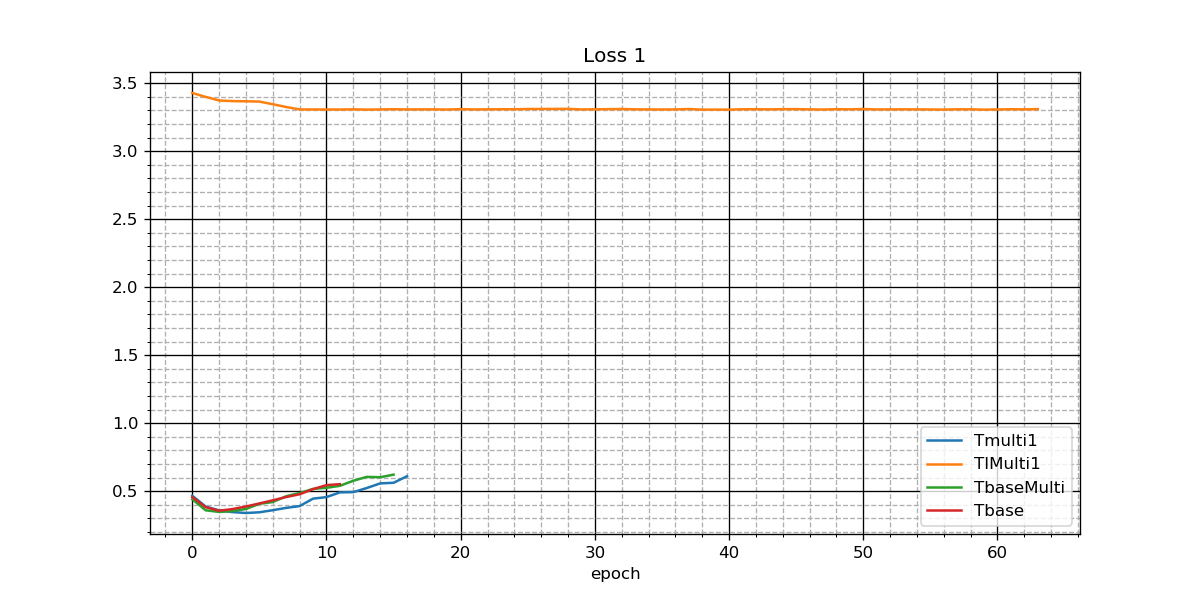

In [6]:
for k in losses:
    plotCurves(losses[k], "Loss {}".format(k))

<IPython.core.display.Javascript object>


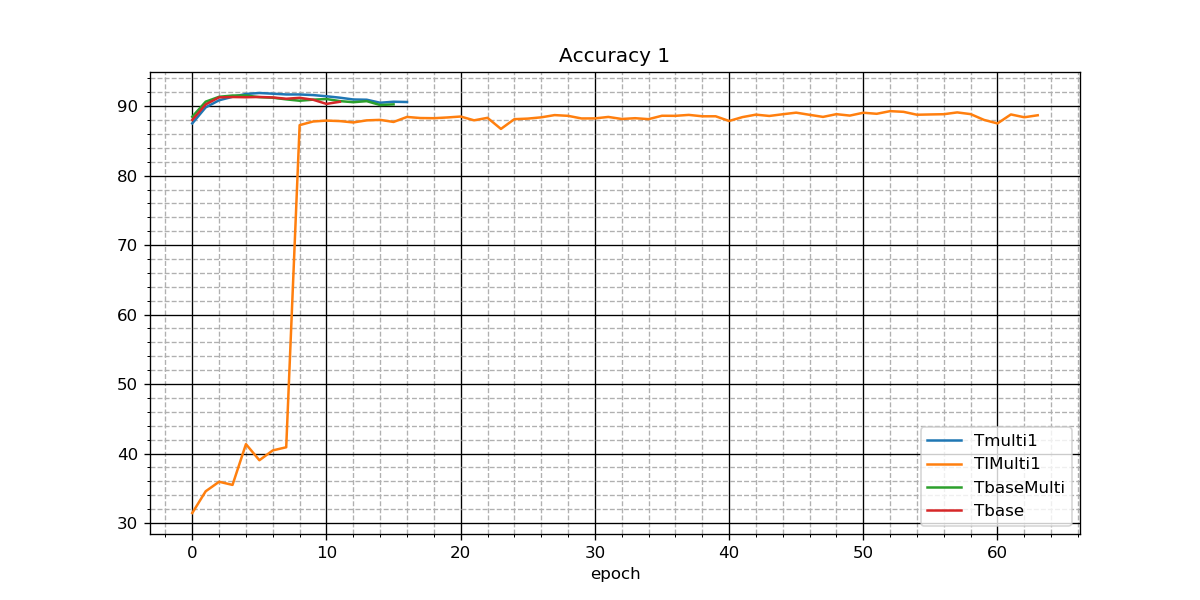

In [7]:
for k in accs:
    plotCurves(accs[k], "Accuracy {}".format(k))
    #plotCurves(accs[k], save="tmp/accuracy-{}.eps".format(k))

### make sense only if comparative

In [8]:
maxTests = {k:{c:fun.getMaxTest(confs[k][c]) for c in centers} for k in confs}
maxTests

{1: {'Tmulti1': 90.24361419677734,
  'TIMulti1': 87.48458862304688,
  'TbaseMulti': 89.76812744140625,
  'Tbase': 89.29263305664062}}

In [9]:
maxEpochs = {k:{c:fun.getMaxValidEpoch(confs[k][c]) for c in centers} for k in confs}
maxEpochs

{1: {'Tmulti1': 5, 'TIMulti1': 52, 'TbaseMulti': 4, 'Tbase': 5}}

### make sense only if folds

In [10]:
maxTests = {k:{c:fun.getMaxTest(confs[k][c]) for c in centers} for k in confs}

In [11]:
means = {k:mean([maxTests[k][c] for c in centers]) for k in confs}

In [12]:
means

{1: 89.19724082946777}